# Quick Start Tutorial
The quickest way to perform a conversion of files is to simply pass a file or directory path to the `masks.quick_mask_generation_from_images()` function.

In [1]:
import masks
import os
example_dir = os.path.join('data', 'batch_example')
masks.quick_mask_generation_from_images(example_dir)

Beginning quick mask generation...
Matched 5 image files to perform mask conversion on.

# 1 of 5 | Attempting conversion of file "test_2d.tif".
Loaded image data has shape: (200, 200)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\batch_example\test_2d.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Mask command file(s) generation complete!
write_command_files took 0:00:00.226637 h:m:s.
-------------------------------------------------------------------------------
# 2 of 5 | Attempting conversion of file "test_2d_smile.tif".
Loaded image data has shape: (512, 512)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\batch_example\test_2d_smile.tif_mask_outputs".
Writing file with conversion fact

## `masks.quick_mask_generation_from_images()` documentation

The `masks.quick_mask_generation_from_images()` function has a number inputs for customization of behavior.

```python
def quick_mask_generation_from_images(
        path,
        *,
        recursive=True,
        plot_results=False,
        file_extensions=None,
        mask_from_image_kwargs=None,
        shift_pixel_kwargs=None,        
        write_command_files_kwargs=None):
```
* **path**: (`str`) file path to a directory or file where the image to mask conversion should be performed. If a directory is passed, all matching image files in the directory (and subdirectories if `recursive` is true) will attempt to be converted.
* **recursive**: (`bool`) `True` indicates to search in subfolders for image files if `path` is a directory.
* **plot_results**: (`bool`) `True` indicates that figures of the mask will be generated as the mask generation process progresses.
* **file_extensions**: (`[str]`) a list of `str`s containing the extensions to match when locating image files. If unset or `None` is passed for this argument, the default extensions are:
  * `.tif`
  * `.tiff`
  * `.png`
* **mask_from_image_kwargs**: (`dict`) a dictionary of keyword arguments which will be passed to the `masks.Mask.from_image()` method. See the full tutorial sections below and the source code for more information. Valid keywords are:
  * `to_float`
  * `to_binary`
* **shift_pixel_kwargs**: (`dict`) a dictionary of keyword arguments which will be passed to the `masks.Mask.shift_pixel_edges()` method. See the full tutorial sections below and the source code for more information. Valid keywords are:
  * `rising_edge_shift`
  * `falling_edge_shift`
  * `scan_axis`
  * `do_plot_results`
  * `warn`
  * `reverse_scan_direction`
* **write_command_files_kwargs**: (`dict`) a dictionary of keyword arguments which will be passed to the `masks.Mask.write_command_files()` method. See the full tutorial sections below and the source code for more information. Valid keywords are:
  * `save_dir`
  * `chunk_list_kwargs`
  * `pam_command_kwargs`
  * `do_optimize_file_size`
  * `do_split_files`
  * `file_split_size_mb`
  * `do_preview`
  * `do_allow_binary_inversion`
  * `auto_set_label_to_id`
  * `max_num_output_values`
  * `do_prepare_sequential_import`

# Full Tutorial: Getting Started

First we'll import the local masks package and other needed packages.

In [2]:
import masks
import os
import c_swain_python_utils as csutils

## Converting a Binary Image

First we'll specify the path to a text image that we want to convert to an image file.

In [3]:
file_name = 'test_2d_smile.tif'
data_dir = os.path.join('data', 'examples')
file_path = os.path.join(data_dir, file_name)

We'll then create a `Mask` object from the image file.

In [4]:
mask = masks.Mask.from_image(file_path)

Loaded image data has shape: (512, 512)


We'll then convert the `Mask` object to an importable photo-activation mask (PAM) text file containg commands to define the mask within PrairieView.

By default the command files will be written into a directory next to the imported image named `{image_filename}_mask_commands`.

Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_2d_smile.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Attempting to preview command file "data\examples\test_2d_smile.tif_mask_outputs\size=512x512_z=001_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


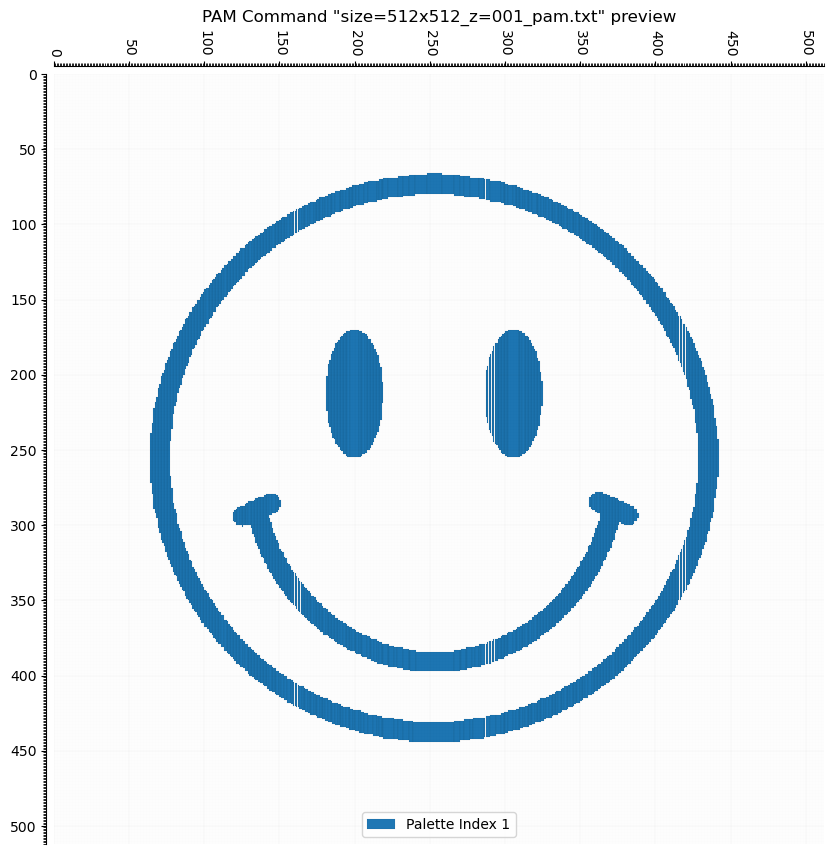

Mask command file(s) generation complete!
write_command_files took 0:00:08.445656 h:m:s.


In [5]:
mask.write_command_files()

The output is previewed in the figure above. 

We can also look directly at the text file contents (which is a series of labeled polygon definitions, interperatable by PrairieView).

In [6]:
output_path = os.path.join(file_path + '_' + masks.Mask.save_dir_tag, 'size=512x512_z=001_pam.txt')
with open(output_path, 'r') as f:
    contents = f.readlines()
    
print(f'Command File "{output_path:s}" Contents:')
print(contents[0][:80] + ' ...')

Command File "data\examples\test_2d_smile.tif_mask_outputs\size=512x512_z=001_pam.txt" Contents:
0.12502,0.46682,0.12693,0.46682,0.12693,0.53123,0.12502,0.53123,-1,0.12697,0.453 ...


## Non-Binary Images

Let's try again with a file having multiple image levels

Loaded image data has shape: (200, 200)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_2d.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


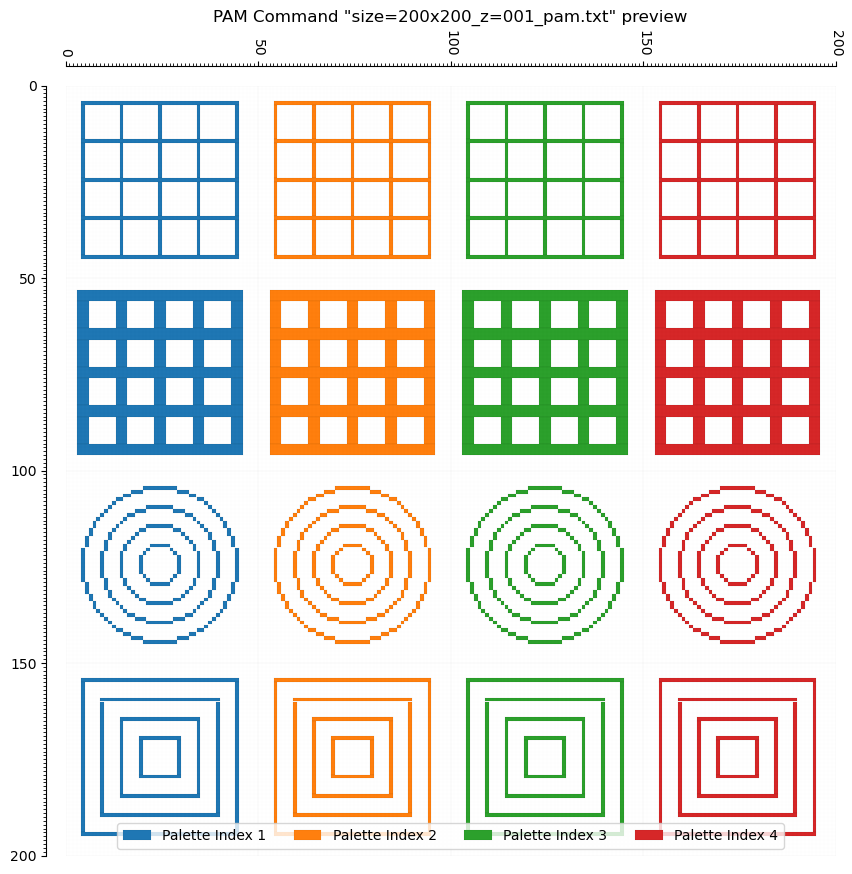

Mask command file(s) generation complete!
write_command_files took 0:00:04.126384 h:m:s.


In [7]:
file_name = 'test_2d.tif'
file_path = os.path.join(data_dir, file_name)
mask = masks.Mask.from_image(file_path)
mask.write_command_files()

We can use the `split_values` flag passed by the `pam_command_kwargs` argument in the `write_command_files` method to generate different command files for each mask value.

Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_2d.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.


Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=001_value=0010_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


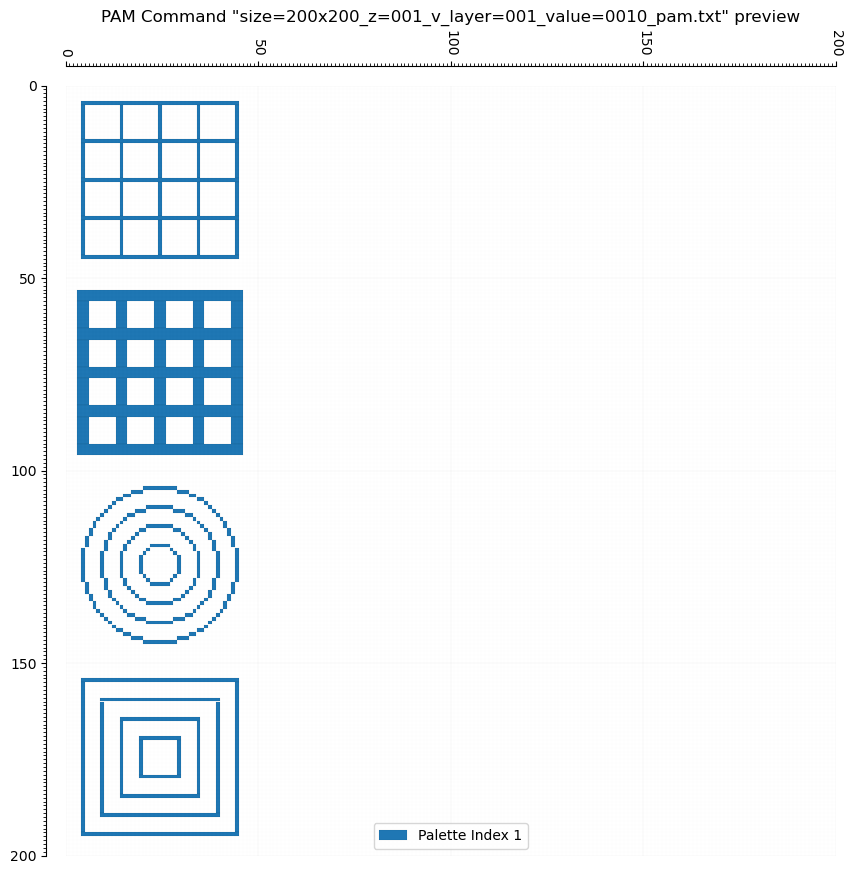

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=002_value=0020_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


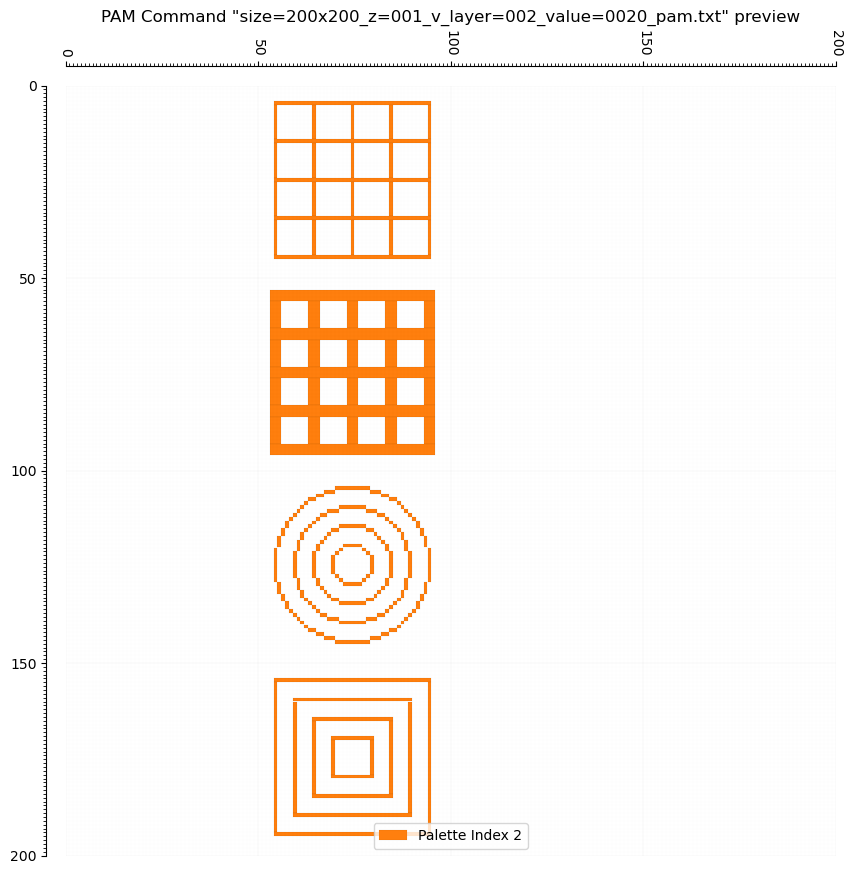

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=003_value=0030_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


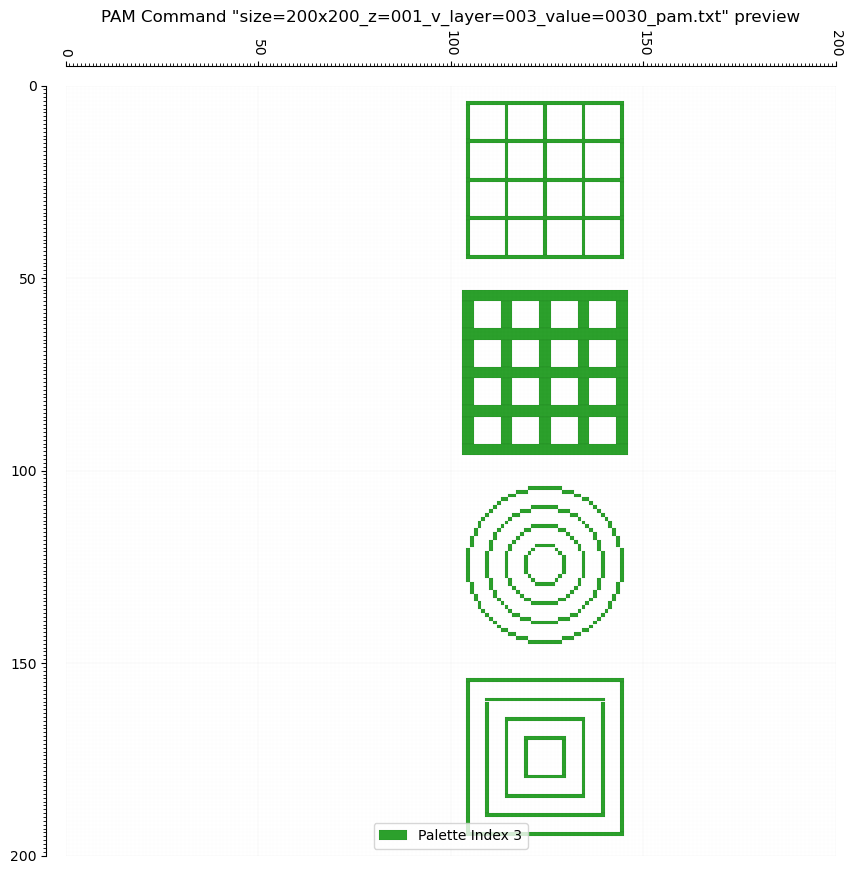

Attempting to preview command file "data\examples\test_2d.tif_mask_outputs\size=200x200_z=001_v_layer=004_value=0040_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


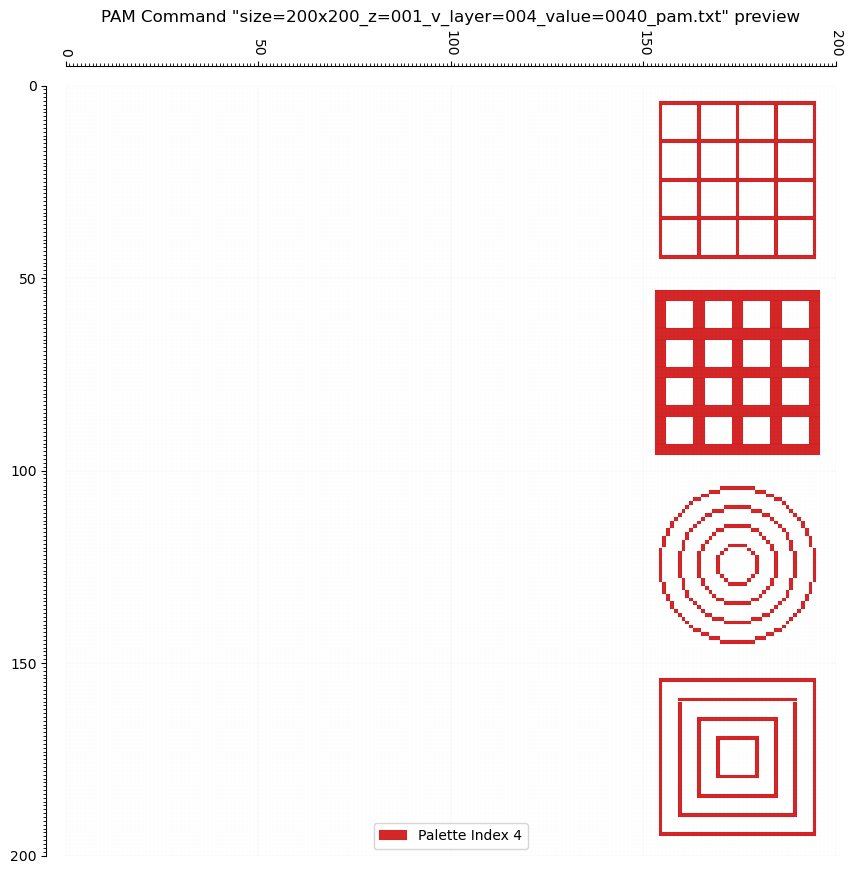

Mask command file(s) generation complete!
write_command_files took 0:00:12.181459 h:m:s.


In [8]:
mask.write_command_files(pam_command_kwargs=dict(split_values=True))

## 3D Images

We can also process a 3D tiff stack into a seriese of masks. Notice that the mask output for the second slice is split into multiple files to keep each command text file under the limit of 0.25 MB. These split files are saved in a subfolder tagged 'SPLIT' with the file information.

Loaded image data has shape: (5, 512, 512)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_3d_v2.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=001_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


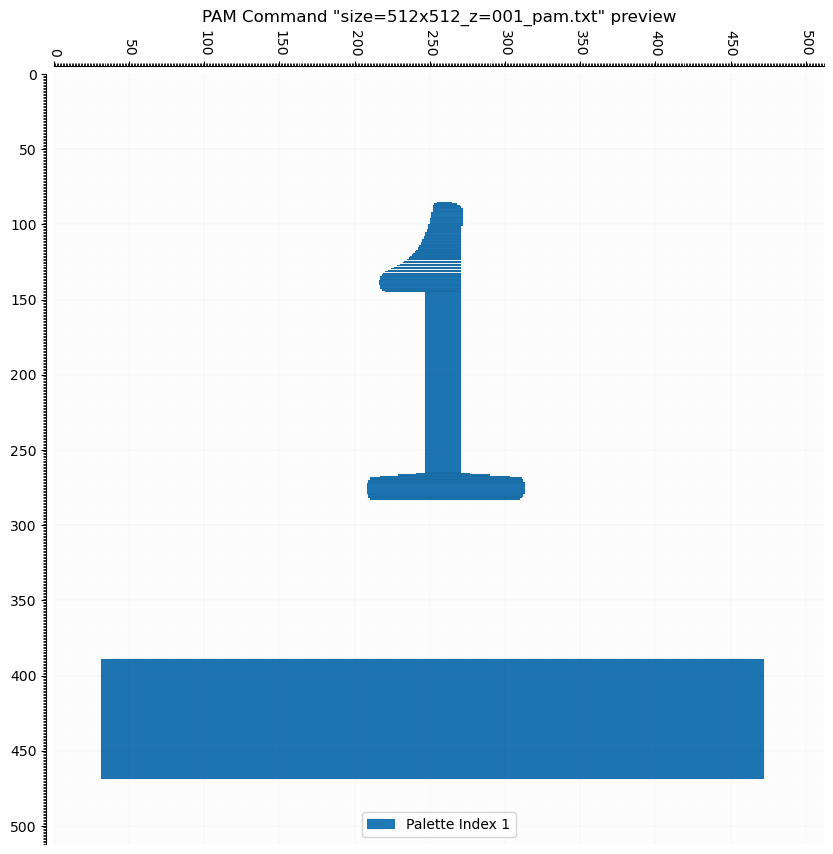

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=002_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


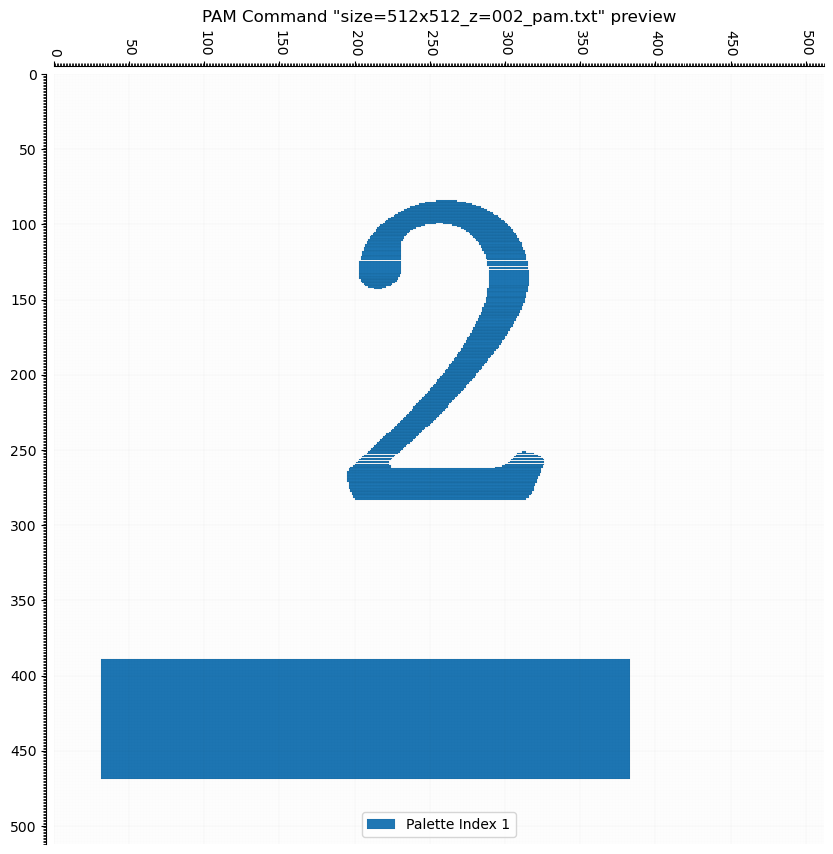

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=003_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


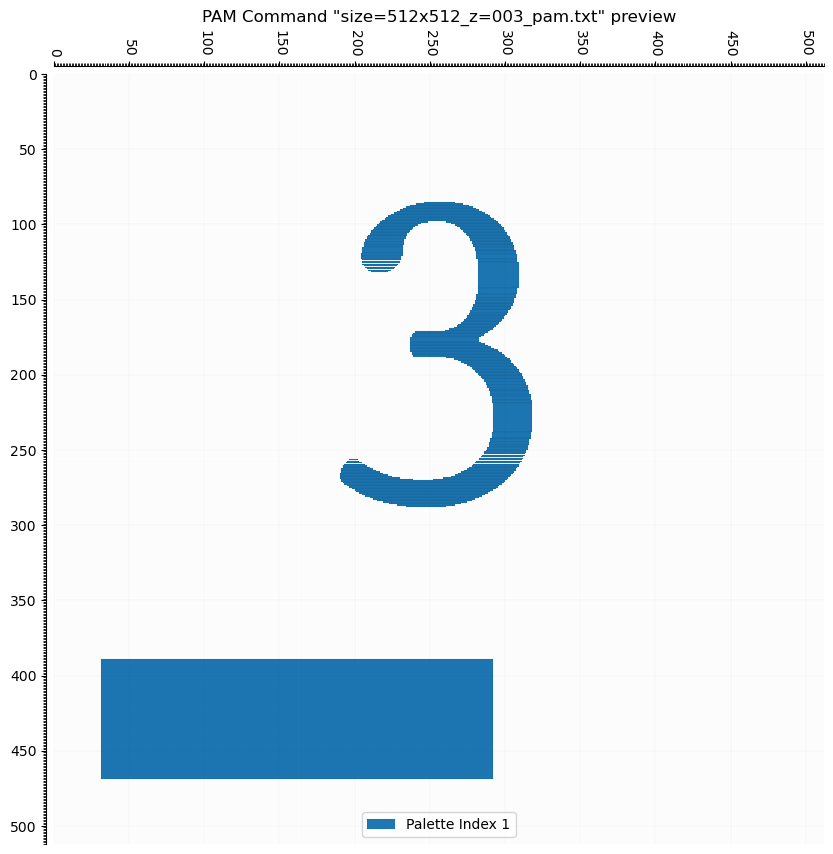

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=004_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


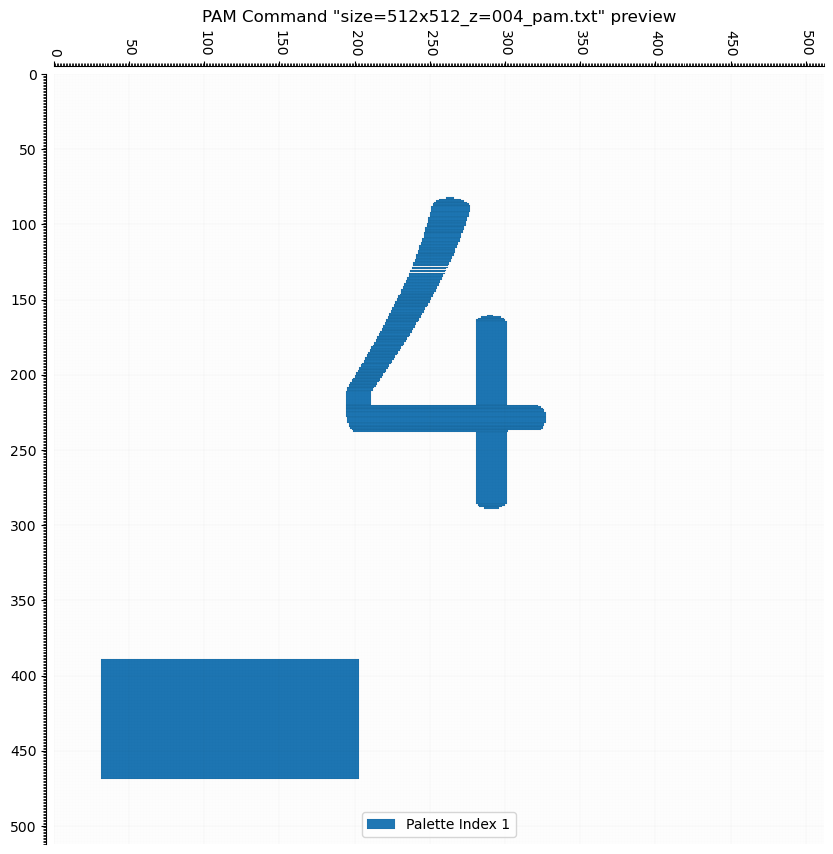

Attempting to preview command file "data\examples\test_3d_v2.tif_mask_outputs\size=512x512_z=005_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


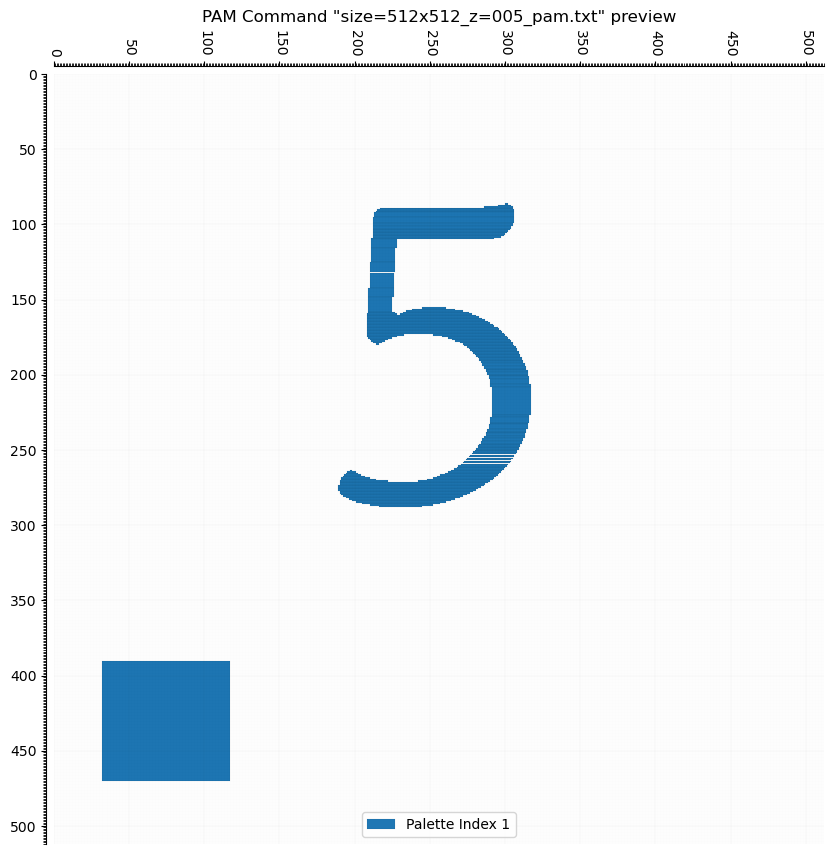

Mask command file(s) generation complete!
write_command_files took 0:00:34.714367 h:m:s.


In [9]:
file_name = 'test_3d_v2.tif'
file_path = os.path.join(data_dir, file_name)
mask = masks.Mask.from_image(file_path)
mask.write_command_files()

## Speeding Up Mask Generation
The generation of mask files can be sped up significantly be skipping generation of the mask preview figures.

This can be accomplished by passing the `do_preview=False` flag to the `write_command_files` method.

In [10]:
file_name = 'test_3d_v2.tif'
file_path = os.path.join(data_dir, file_name)
mask = masks.Mask.from_image(file_path)
mask.write_command_files(do_preview=False)

Loaded image data has shape: (5, 512, 512)
Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_3d_v2.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Mask command file(s) generation complete!
write_command_files took 0:00:00.368407 h:m:s.


## Pixel Edge Shifting

When patterning into a sample using image-based mask files, we have found the the spatial application of laser power differs slightly from what is specified in by the mask. More specifically the location of the "edge" (i.e. laser 50% power) based on a reading of the laser power is shifted along the scan axis (x-axis) to occur earlier than specified for rising edges (e.g. 0 -> 1 pixel value) and to occur later than expected for falling edges (e.g. 1 -> 0 pixel value). The magnitude of this effect is dependent on the dwell time, the difference in target pockels values, and the scan resolution. Measurement data of this effect is shown below:

![scanline_plot.png](data/misc/scanline_plots_2p_pockels_cell_20230128.png)

![transition_delay_plot.png](data/misc/spatial_transition_delay_2p_pockels_cell_20230128.png)

To counteract this effect, the mask generation software includes a feature to shift rising-edges and falling-edges in the mask data by integer pixel amounts. Positive shifts will move the edge forward (later) along the scan axis and negative shifts will move the edge backward (earlier) along the scan axis. This feature can be accessed by the `masks.Mask.shift_pixel_edges()` method which has the following parameters:

* `rising_edge_shift`: (required) integer amount to shift the rising edges
* `falling_edge_shift`: (required) integer amount to shift the falling edges
* `scanline_axis`: (default is -1, the last axis) this is the axis that is scanned along most quickly by the two-photon instrument (typically the x-axis)
* `do_plot_results`: (default is `True`) a boolean flag to control whether or not the resultant changes to the mask data will be displayed.
* *additional parameters can be found in the source code*

The `masks.Mask.shift_pixel_edges()` method will modify the mask data in-place and should only be called once per mask.

### Example

Using the data above, if we wanted to apply a correction to a mask which will be patterened with a maximum pockels intensity of 331 and a dwell time of 2.0 us, then, with no correction, we would expect that the rising edge will be shifted backward by approx 0.7 pixels and the falling edge would be shifted forward by approx 2.3 pixels. Therefore, to counteract these undesired shifts we would apply corresponding negative shifts via the software:

* `rising_edge_shift=+1` (where $+1 \approx -(-0.7)$)
* `falling_edge_shift=-2` (where $-2 \approx -(+2.3)$)

to our mask data.

Let's use the smile image from the first example

In [11]:
file_name = 'test_2d_smile.tif'
data_dir = os.path.join('data', 'examples')
file_path = os.path.join(data_dir, file_name)

Then we will create a mask from the image at tha path and then apply the pixel shifts using the `masks.Mask.shift_pixel_edges()` method.

Loaded image data has shape: (512, 512)
Shifting the edges of the data along scan_axis -1, the transformation will CONTRACT positive-valued regions by approx 3 pixels, shifting rising edges forward by 1 pixels and falling edges backward by 2 pixels.


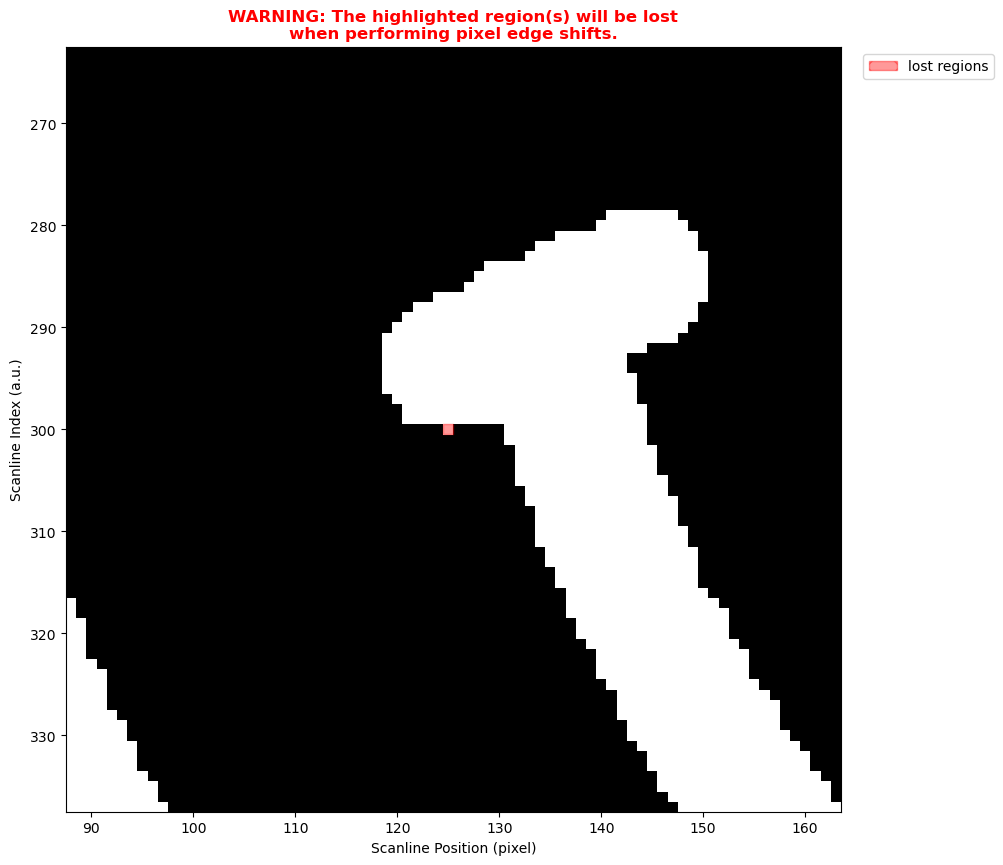

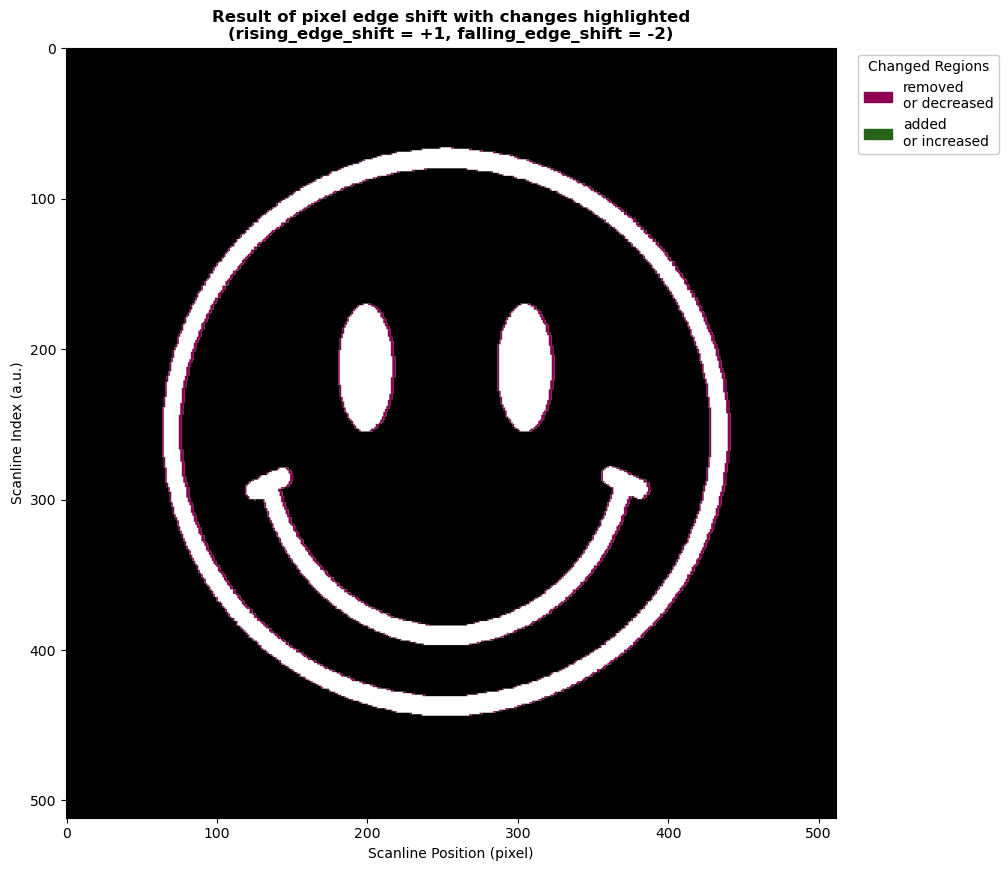

In [12]:
mask = masks.Mask.from_image(file_path)
mask.shift_pixel_edges(rising_edge_shift=1,
                       falling_edge_shift=-2)

Note that the software will warn that a region is too narrow and will be lost when performing the pixel shift. If this is not acceptable to you for your mask data, then you would need to modify your mask file such that there are no regions along the scanline which are too narrow for the shifts.

Finally we can generate the command files from the now-modified mask data. The applied pixel shifts will be noted in the output file(s)' name(s).

Creating photoactivation mask file(s) for import into Prairie View.
Optimizing file size by testing different chunking methods.
Will save mask file(s) in directory:
	"data\examples\test_2d_smile.tif_mask_outputs".
Writing file with conversion factors between palette indices and laser powers.
Attempting to preview command file "data\examples\test_2d_smile.tif_mask_outputs\size=512x512_z=001_rise_shft=+1_fall_shft=-2_pam.txt"
Saving Figure
Displaying preview figure in notebook output:


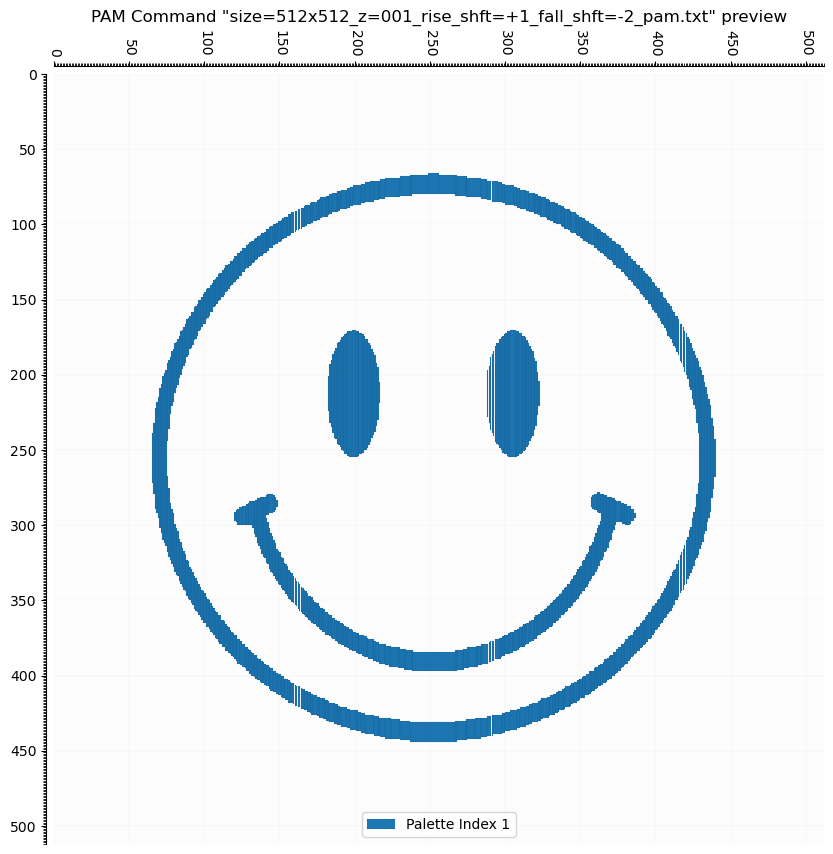

Mask command file(s) generation complete!
write_command_files took 0:00:08.128996 h:m:s.


In [13]:
mask.write_command_files()

## To Be Continued ...
There are many, many other settings which can currently be explored in the source code.